In [17]:
import numpy as np
import findiff as fd
import scipy as sp
import matplotlib.pyplot as plt
from skimage import measure
from skimage import filters

In [2]:
Width  = 3000
Height = 2000
Xmin = -6.0; Xmax = 6.0
Ymin = -4.0; Ymax = 4.0

X = np.linspace(Xmin,Xmax,Width)
Y = np.linspace(Ymin,Ymax,Height)

dx = X[1]-X[0]
dy = Y[1]-Y[0]

Xv,Yv = np.meshgrid(X,Y,indexing="ij")

In [3]:
d_dx = fd.FinDiff(0,dx,1,acc = 2)
d_dy = fd.FinDiff(1,dy,1,acc = 2)

In [4]:
Xv.shape

(3000, 2000)

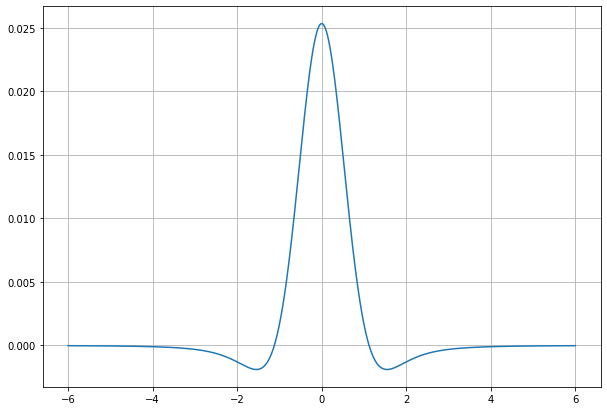

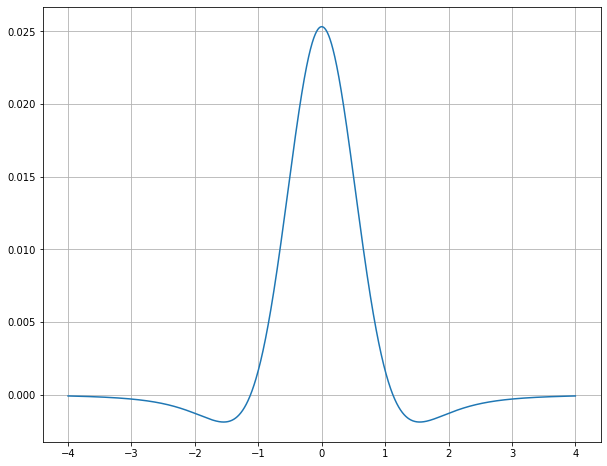

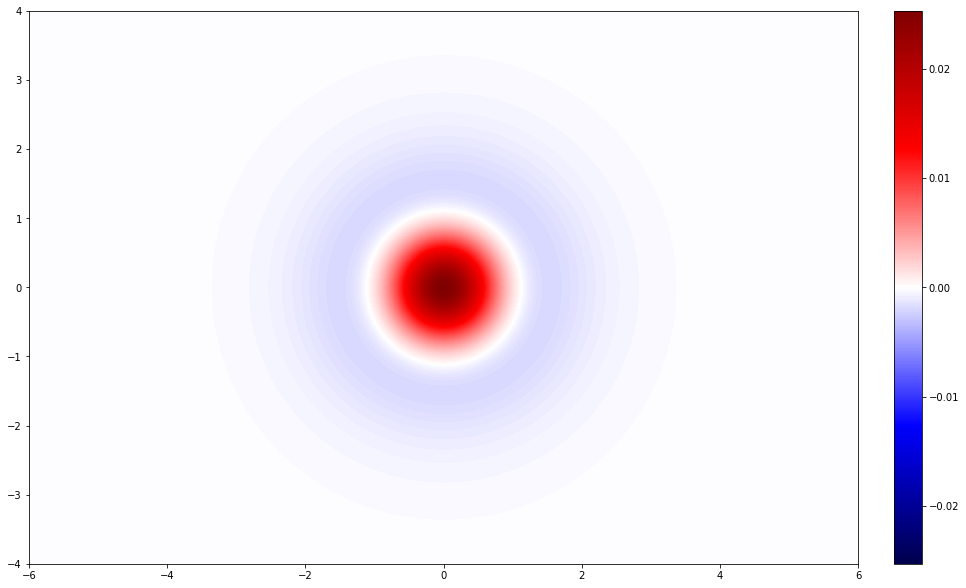

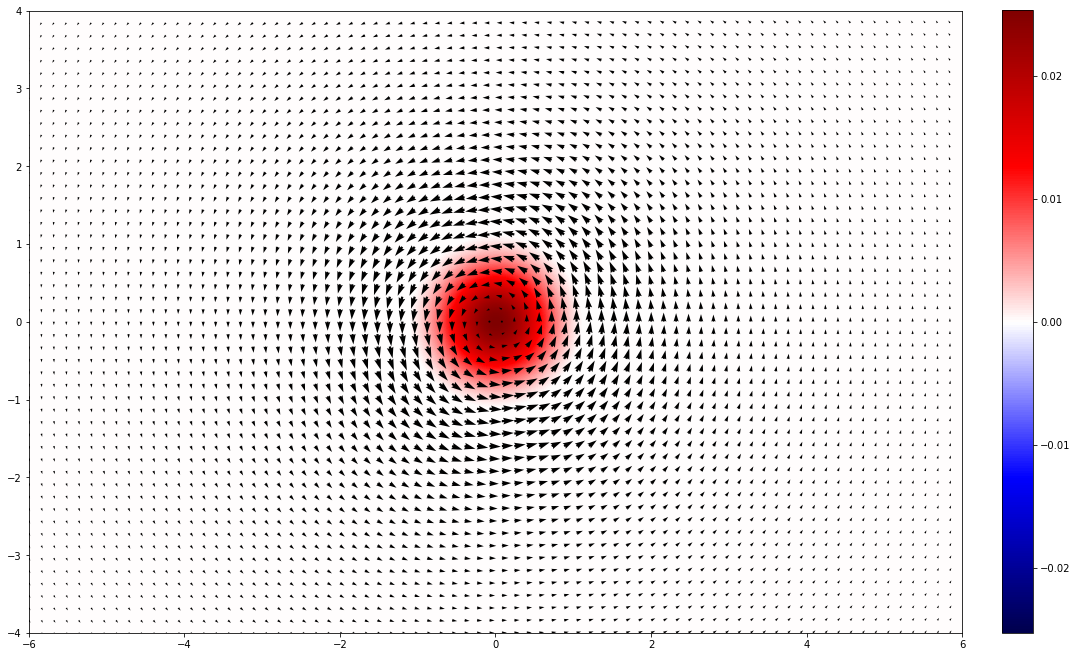

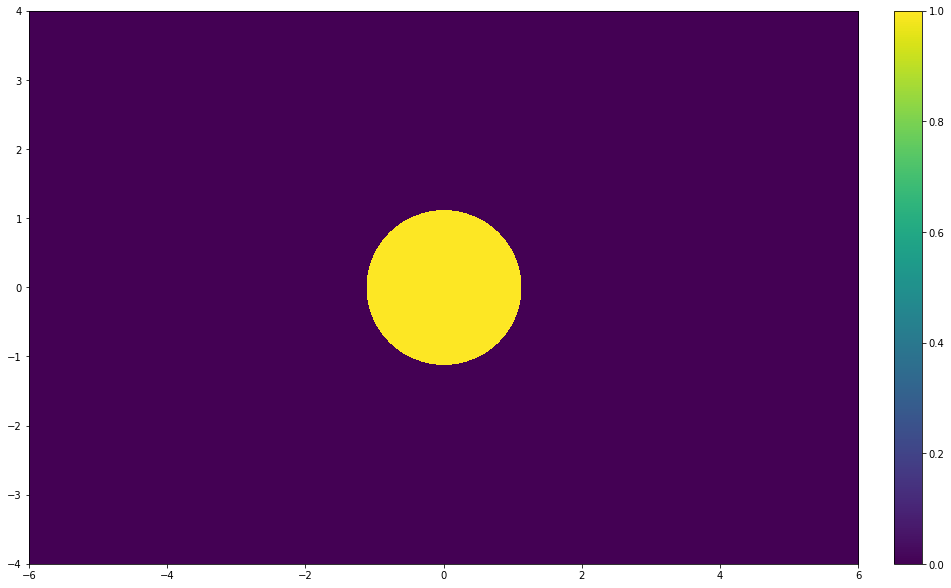

[0 1]
G,rc,xc,yc = 0.9999965938522405,1.0000005633534568,1.6196081106312497e-16,-1.5520394387835254e-16


In [39]:
x0 = 0.0; y0 = 0.0

Gamma = 1.0
rc = 1.0
rc2 = rc**2

u = np.zeros(Xv.shape)
v = np.zeros(Yv.shape)

r2 = (Xv-x0)**2 + (Yv-y0)**2
Fr  = (Gamma/(2*np.pi*r2))*(1-np.exp(-r2/rc2))
u  += - (Yv-y0) * Fr
v  +=   (Xv-x0) * Fr

##############################################

ux = d_dx(u); uy = d_dy(u)
vx = d_dx(v); vy = d_dy(v)

w = vx - uy

detDu = ux*vy - uy*vx
lamb  = detDu 

##############################################

fig = plt.figure(figsize = (10,7))
plt.plot(X,lamb[:,Height//2])
plt.grid()
plt.show()

##############################################

fig = plt.figure(figsize = (10,8))
plt.plot(Y,lamb[Width//2,:])
plt.grid()
plt.show()

##############################################

fig = plt.figure(figsize=(16,16*((Ymax-Ymin)/(Xmax-Xmin))))
cbar = plt.imshow(lamb.T,extent=(Xmin,Xmax,Ymin,Ymax),
                       origin='lower', cmap='seismic',aspect='equal',
                       vmin = -np.max(lamb),vmax = np.max(lamb))
fig.colorbar(cbar,fraction=0.031, pad=0.04)

##############################################

lamb[lamb<0.0] = 0.0

fig = plt.figure(figsize=(18,18*((Ymax-Ymin)/(Xmax-Xmin))))

skip = 40
plt.quiver(Xv[::skip,::skip],Yv[::skip,::skip],u[::skip,::skip],v[::skip,::skip],scale = 7.5)

cbar = plt.imshow(lamb.T,extent=(Xmin,Xmax,Ymin,Ymax),
                       origin='lower', cmap='seismic',aspect='equal',
                       vmin = -np.max(lamb),vmax = np.max(lamb))
fig.colorbar(cbar,fraction=0.031, pad=0.04)

###############################################

blobs = measure.label(lamb>0.0,background=0)

fig = plt.figure(figsize=(16,16))

cbar = plt.imshow(blobs.T,extent=(Xmin,Xmax,Ymin,Ymax),origin='lower')
fig.colorbar(cbar,fraction=0.031, pad=0.04)

plt.show() 

###############################################
print(np.unique(blobs))

chi = np.zeros(lamb.shape)
chi[blobs == 1] = 1

###############################################

# scipy.integrate.simps(y, x=None, dx=1, axis=- 1, even='avg')
area     = sp.integrate.simps(sp.integrate.simps(chi,X,axis = 0),Y,axis=0)
intOmega = sp.integrate.simps(sp.integrate.simps(chi*w,X,axis = 0),Y,axis=0)
Xw       = sp.integrate.simps(sp.integrate.simps(chi*w*Xv,X,axis = 0),Y,axis=0)
Yw       = sp.integrate.simps(sp.integrate.simps(chi*w*Yv,X,axis = 0),Y,axis=0)

rc = np.sqrt(area/np.pi)/1.12091
G  = 1.397948086 * intOmega
xc = Xw/intOmega
yc = Yw/intOmega

print("G,rc,xc,yc = {0},{1},{2},{3}".format(G,rc,xc,yc))

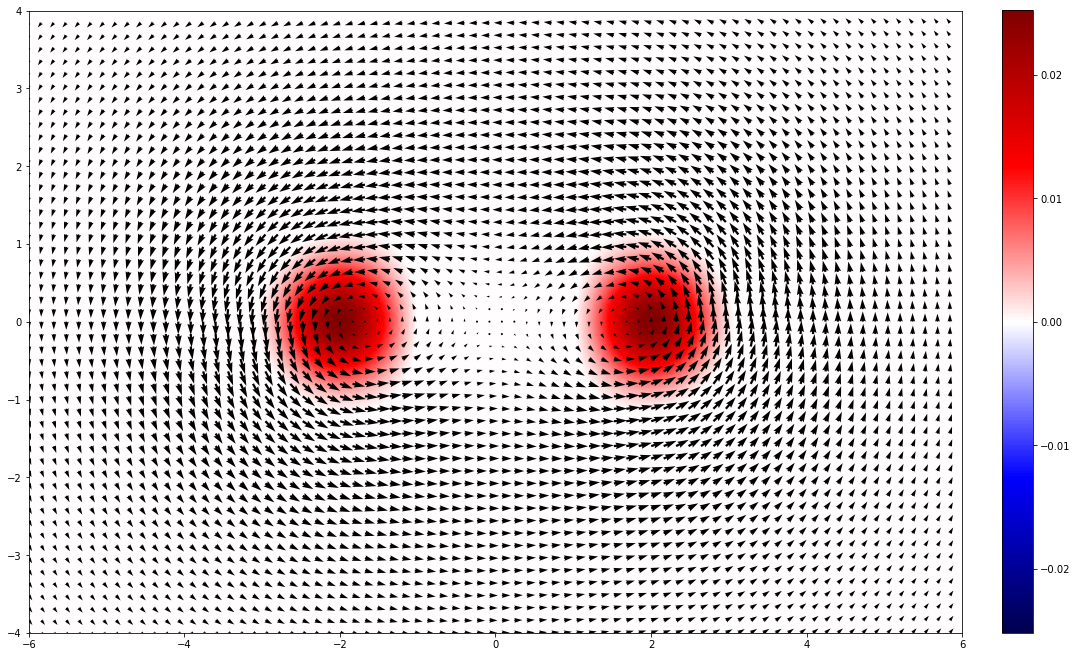

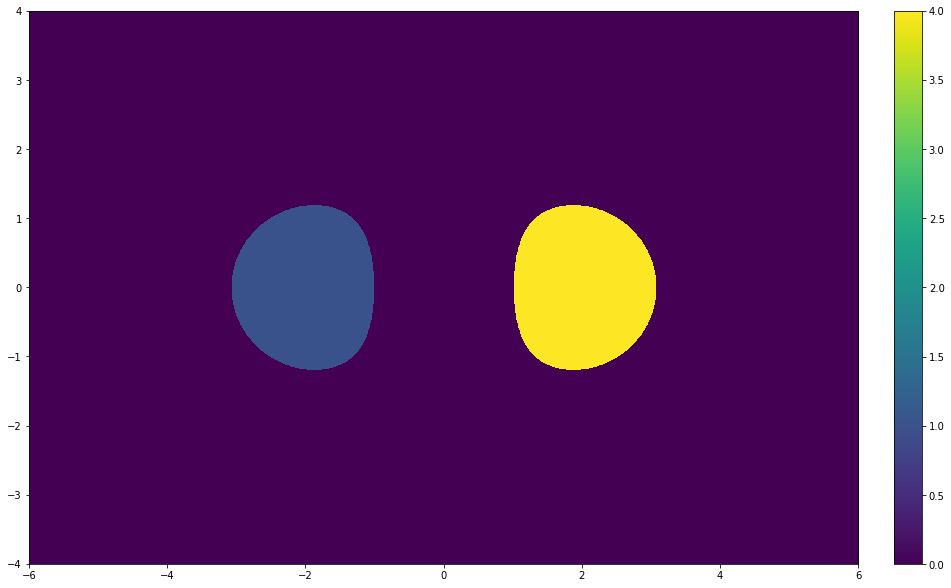

[0 1 2 3 4]
G,rc,xc,yc = 0.997,1.001,-2,-1.168e-16
G,rc,xc,yc = 2.882e-08,0.004934,4.441e-16,-1.999
G,rc,xc,yc = 2.882e-08,0.004934,-3.597e-15,1.999
G,rc,xc,yc = 0.997,1.001,2,-1.362e-16


In [43]:
x0,y0 = -2.0,0.0
x1,y1 =  2.0,0.0

Gamma0 = 1.0
Gamma1 = 1.0

Gamma = 1.0
rc = 1.0
rc2 = rc**2

u = np.zeros(Xv.shape)
v = np.zeros(Yv.shape)

r2 = (Xv-x0)**2 + (Yv-y0)**2
Fr = (Gamma0/(2*np.pi*r2))*(1-np.exp(-r2/rc2))
u += (- (Yv-y0) * Fr)
v +=    (Xv-x0) * Fr

r2 = (Xv-x1)**2 + (Yv-y1)**2
Fr = (Gamma1/(2*np.pi*r2))*(1-np.exp(-r2/rc2))
u += (- (Yv-y1) * Fr)
v +=    (Xv-x1) * Fr

##############################################

ux = d_dx(u); uy = d_dy(u)
vx = d_dx(v); vy = d_dy(v)

w = vx - uy

detDu = ux*vy - uy*vx
lamb  = detDu 

##############################################

lamb[lamb<0.0] = 0.0

fig = plt.figure(figsize=(18,18*((Ymax-Ymin)/(Xmax-Xmin))))

skip = 40
plt.quiver(Xv[::skip,::skip],Yv[::skip,::skip],u[::skip,::skip],v[::skip,::skip],scale = 7.5)

cbar = plt.imshow(lamb.T,extent=(Xmin,Xmax,Ymin,Ymax),
                       origin='lower', cmap='seismic',aspect='equal',
                       vmin = -np.max(lamb),vmax = np.max(lamb))
fig.colorbar(cbar,fraction=0.031, pad=0.04)

###############################################

blobs = measure.label(lamb>0.0,background=0)

fig = plt.figure(figsize=(16,16))

cbar = plt.imshow(blobs.T,extent=(Xmin,Xmax,Ymin,Ymax),origin='lower')
fig.colorbar(cbar,fraction=0.031, pad=0.04)

plt.show()

###############################################

blobs = measure.label(lamb>0.0,background=0)
print(np.unique(blobs))

for k in np.unique(blobs)[1:]:
    chi = np.zeros(lamb.shape)
    chi[blobs == k] = 1
    
    ###############################################
    # scipy.integrate.simps(y, x=None, dx=1, axis=- 1, even='avg')
    area     = sp.integrate.simps(sp.integrate.simps(chi,X,axis = 0),Y,axis=0)
    intOmega = sp.integrate.simps(sp.integrate.simps(chi*w,X,axis = 0),Y,axis=0)
    Xw       = sp.integrate.simps(sp.integrate.simps(chi*w*Xv,X,axis = 0),Y,axis=0)
    Yw       = sp.integrate.simps(sp.integrate.simps(chi*w*Yv,X,axis = 0),Y,axis=0)
    
    rc = np.sqrt(area/np.pi)/1.12091
    G  = 1.397948086 * intOmega
    xc = Xw/intOmega
    yc = Yw/intOmega
    
    print("G,rc,xc,yc = {0:.4g},{1:.4g},{2:.4g},{3:.4g}".format(G,rc,xc,yc))

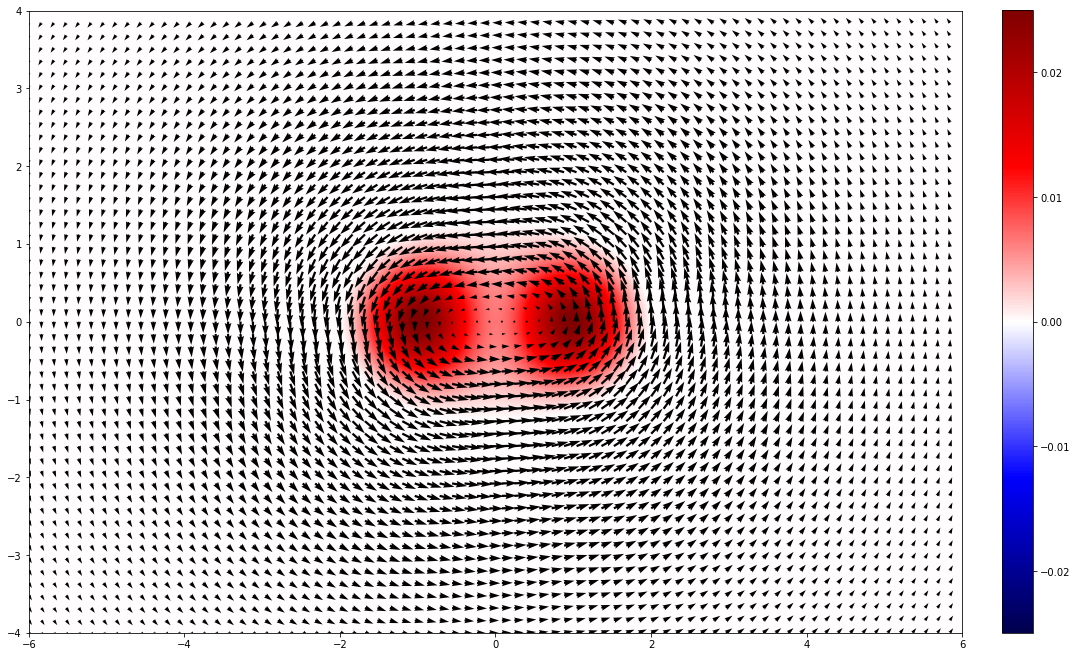

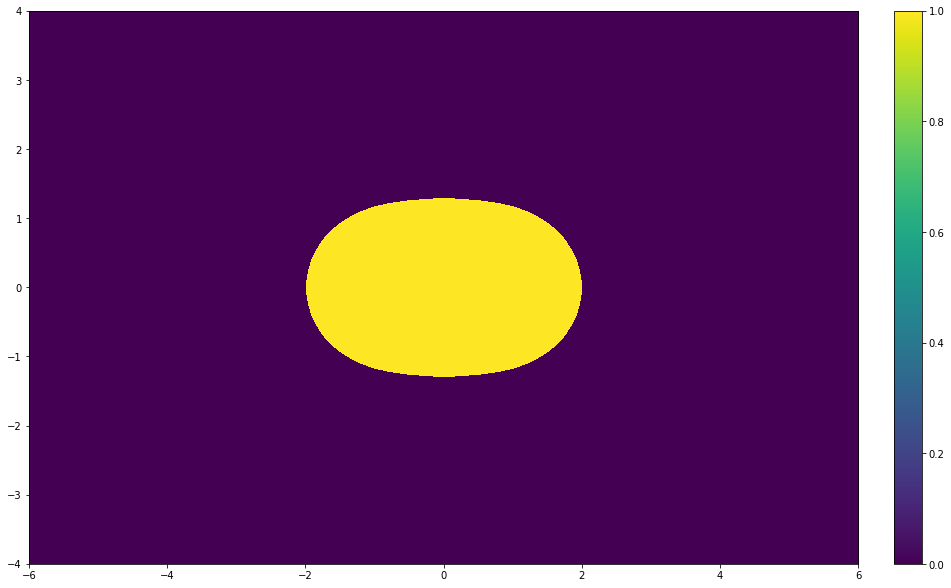

[0 1]
G,rc,xc,yc = 2.216,1.463,1.972e-16,-8.756e-17


In [45]:
x0,y0 = -1.0,0.0
x1,y1 =  1.0,0.0

Gamma0 = 1.0
Gamma1 = 1.0

Gamma = 1.0
rc = 1.0
rc2 = rc**2

u = np.zeros(Xv.shape)
v = np.zeros(Yv.shape)

r2 = (Xv-x0)**2 + (Yv-y0)**2
Fr = (Gamma0/(2*np.pi*r2))*(1-np.exp(-r2/rc2))
u += (- (Yv-y0) * Fr)
v +=    (Xv-x0) * Fr

r2 = (Xv-x1)**2 + (Yv-y1)**2
Fr = (Gamma1/(2*np.pi*r2))*(1-np.exp(-r2/rc2))
u += (- (Yv-y1) * Fr)
v +=    (Xv-x1) * Fr

##############################################

ux = d_dx(u); uy = d_dy(u)
vx = d_dx(v); vy = d_dy(v)

w = vx - uy

detDu = ux*vy - uy*vx
lamb  = detDu 

##############################################

lamb[lamb<0.0] = 0.0

fig = plt.figure(figsize=(18,18*((Ymax-Ymin)/(Xmax-Xmin))))

skip = 40
plt.quiver(Xv[::skip,::skip],Yv[::skip,::skip],u[::skip,::skip],v[::skip,::skip],scale = 7.5)

cbar = plt.imshow(lamb.T,extent=(Xmin,Xmax,Ymin,Ymax),
                       origin='lower', cmap='seismic',aspect='equal',
                       vmin = -np.max(lamb),vmax = np.max(lamb))
fig.colorbar(cbar,fraction=0.031, pad=0.04)

###############################################

blobs = measure.label(lamb>0.0,background=0)

fig = plt.figure(figsize=(16,16))

cbar = plt.imshow(blobs.T,extent=(Xmin,Xmax,Ymin,Ymax),origin='lower')
fig.colorbar(cbar,fraction=0.031, pad=0.04)

plt.show()

###############################################

blobs = measure.label(lamb>0.0,background=0)
print(np.unique(blobs))

for k in np.unique(blobs)[1:]:
    chi = np.zeros(lamb.shape)
    chi[blobs == k] = 1
    
    ###############################################
    # scipy.integrate.simps(y, x=None, dx=1, axis=- 1, even='avg')
    area     = sp.integrate.simps(sp.integrate.simps(chi,X,axis = 0),Y,axis=0)
    intOmega = sp.integrate.simps(sp.integrate.simps(chi*w,X,axis = 0),Y,axis=0)
    Xw       = sp.integrate.simps(sp.integrate.simps(chi*w*Xv,X,axis = 0),Y,axis=0)
    Yw       = sp.integrate.simps(sp.integrate.simps(chi*w*Yv,X,axis = 0),Y,axis=0)
    
    rc = np.sqrt(area/np.pi)/1.12091
    G  = 1.397948086 * intOmega
    xc = Xw/intOmega
    yc = Yw/intOmega
    
    print("G,rc,xc,yc = {0:.4g},{1:.4g},{2:.4g},{3:.4g}".format(G,rc,xc,yc))

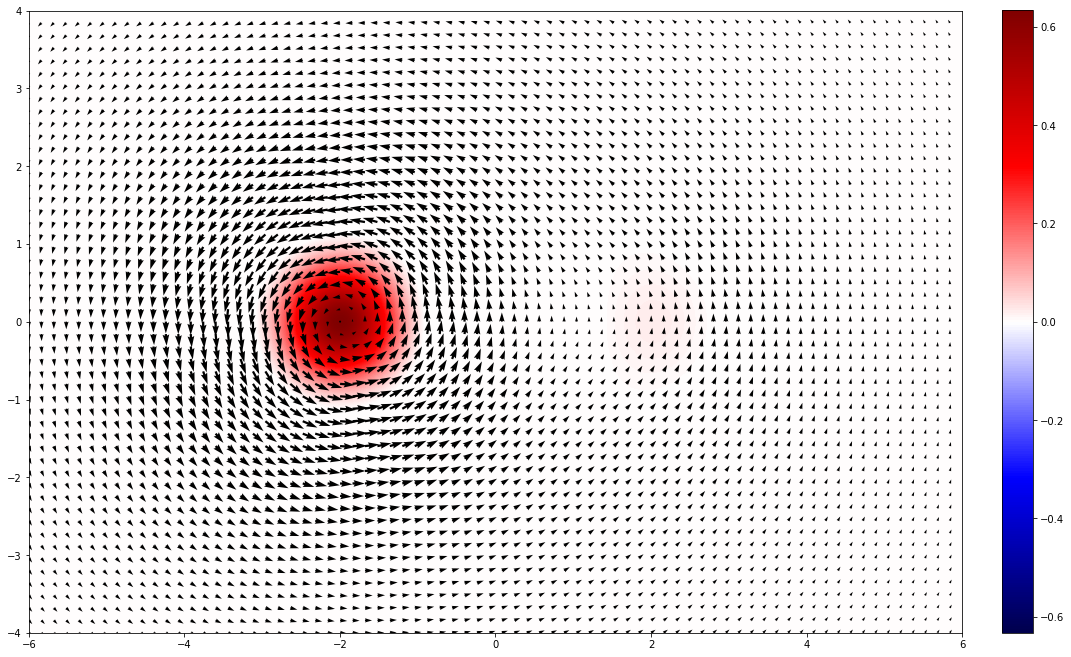

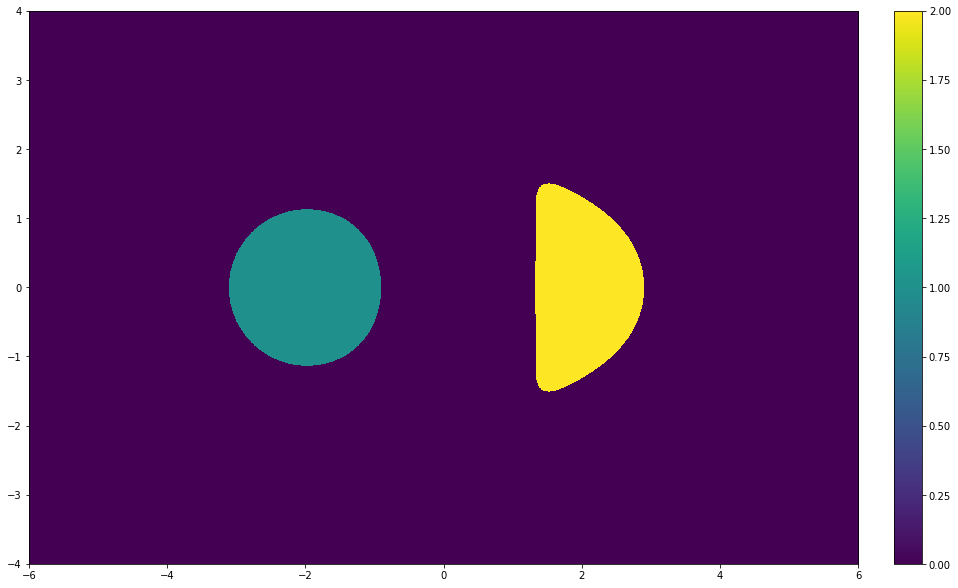

[0 1 2]
G,rc,xc,yc = 4.999,1,-2,-1.552e-16
G,rc,xc,yc = 0.8871,0.9512,2.019,-1.093e-16


In [46]:
x0,y0 = -2.0,0.0
x1,y1 =  2.0,0.0

Gamma0 = 5.0
Gamma1 = 1.0

Gamma = 1.0
rc = 1.0
rc2 = rc**2

u = np.zeros(Xv.shape)
v = np.zeros(Yv.shape)

r2 = (Xv-x0)**2 + (Yv-y0)**2
Fr = (Gamma0/(2*np.pi*r2))*(1-np.exp(-r2/rc2))
u += (- (Yv-y0) * Fr)
v +=    (Xv-x0) * Fr

r2 = (Xv-x1)**2 + (Yv-y1)**2
Fr = (Gamma1/(2*np.pi*r2))*(1-np.exp(-r2/rc2))
u += (- (Yv-y1) * Fr)
v +=    (Xv-x1) * Fr

##############################################

ux = d_dx(u); uy = d_dy(u)
vx = d_dx(v); vy = d_dy(v)

w = vx - uy

detDu = ux*vy - uy*vx
lamb  = detDu 

##############################################

lamb[lamb<0.0] = 0.0

fig = plt.figure(figsize=(18,18*((Ymax-Ymin)/(Xmax-Xmin))))

skip = 40
plt.quiver(Xv[::skip,::skip],Yv[::skip,::skip],u[::skip,::skip],v[::skip,::skip],scale = 30)

cbar = plt.imshow(lamb.T,extent=(Xmin,Xmax,Ymin,Ymax),
                       origin='lower', cmap='seismic',aspect='equal',
                       vmin = -np.max(lamb),vmax = np.max(lamb))
fig.colorbar(cbar,fraction=0.031, pad=0.04)

###############################################

blobs = measure.label(lamb>0.0,background=0)

fig = plt.figure(figsize=(16,16))

cbar = plt.imshow(blobs.T,extent=(Xmin,Xmax,Ymin,Ymax),origin='lower')
fig.colorbar(cbar,fraction=0.031, pad=0.04)

plt.show()

###############################################

blobs = measure.label(lamb>0.0,background=0)
print(np.unique(blobs))

for k in np.unique(blobs)[1:]:
    chi = np.zeros(lamb.shape)
    chi[blobs == k] = 1
    
    ###############################################
    # scipy.integrate.simps(y, x=None, dx=1, axis=- 1, even='avg')
    area     = sp.integrate.simps(sp.integrate.simps(chi,X,axis = 0),Y,axis=0)
    intOmega = sp.integrate.simps(sp.integrate.simps(chi*w,X,axis = 0),Y,axis=0)
    Xw       = sp.integrate.simps(sp.integrate.simps(chi*w*Xv,X,axis = 0),Y,axis=0)
    Yw       = sp.integrate.simps(sp.integrate.simps(chi*w*Yv,X,axis = 0),Y,axis=0)
    
    rc = np.sqrt(area/np.pi)/1.12091
    G  = 1.397948086 * intOmega
    xc = Xw/intOmega
    yc = Yw/intOmega
    
    print("G,rc,xc,yc = {0:.4g},{1:.4g},{2:.4g},{3:.4g}".format(G,rc,xc,yc))

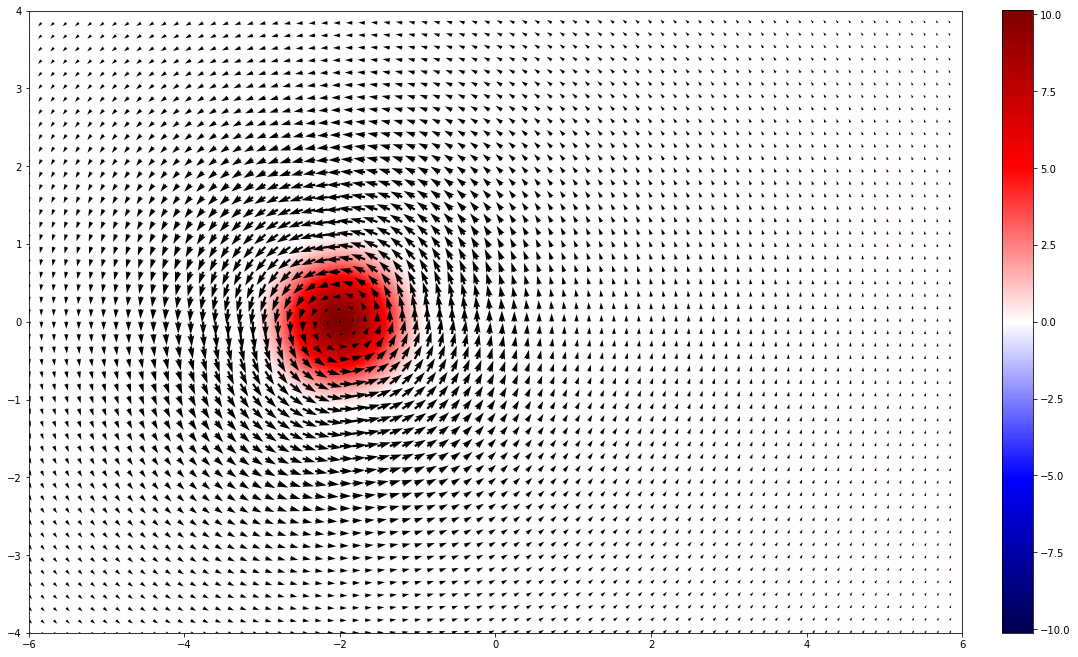

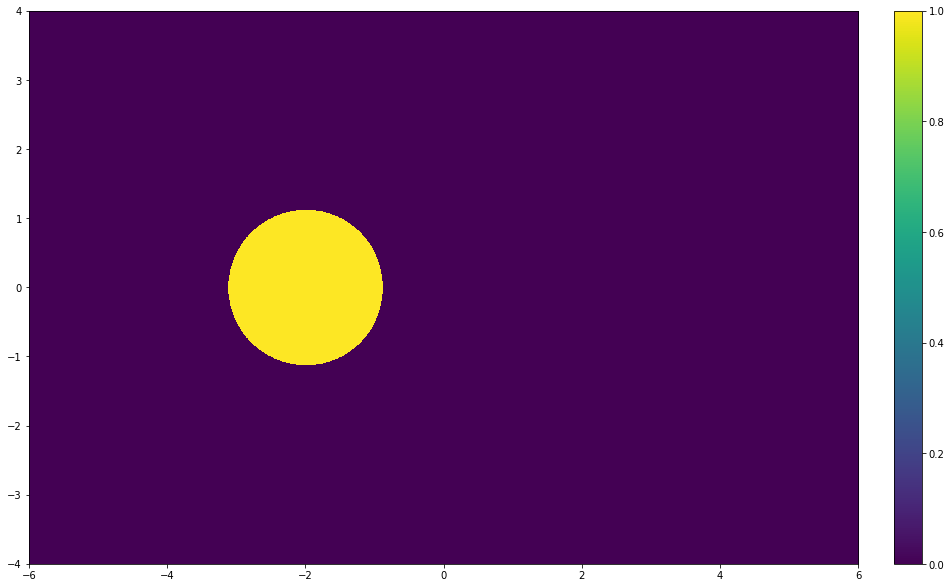

[0 1]
G,rc,xc,yc = 20,1,-2,-1.242e-16


In [47]:
x0,y0 = -2.0,0.0
x1,y1 =  2.0,0.0

Gamma0 = 20.0
Gamma1 = 1.0

Gamma = 1.0
rc = 1.0
rc2 = rc**2

u = np.zeros(Xv.shape)
v = np.zeros(Yv.shape)

r2 = (Xv-x0)**2 + (Yv-y0)**2
Fr = (Gamma0/(2*np.pi*r2))*(1-np.exp(-r2/rc2))
u += (- (Yv-y0) * Fr)
v +=    (Xv-x0) * Fr

r2 = (Xv-x1)**2 + (Yv-y1)**2
Fr = (Gamma1/(2*np.pi*r2))*(1-np.exp(-r2/rc2))
u += (- (Yv-y1) * Fr)
v +=    (Xv-x1) * Fr

##############################################

ux = d_dx(u); uy = d_dy(u)
vx = d_dx(v); vy = d_dy(v)

w = vx - uy

detDu = ux*vy - uy*vx
lamb  = detDu 

##############################################

lamb[lamb<0.0] = 0.0

fig = plt.figure(figsize=(18,18*((Ymax-Ymin)/(Xmax-Xmin))))

skip = 40
plt.quiver(Xv[::skip,::skip],Yv[::skip,::skip],u[::skip,::skip],v[::skip,::skip],scale = 120)

cbar = plt.imshow(lamb.T,extent=(Xmin,Xmax,Ymin,Ymax),
                       origin='lower', cmap='seismic',aspect='equal',
                       vmin = -np.max(lamb),vmax = np.max(lamb))
fig.colorbar(cbar,fraction=0.031, pad=0.04)

###############################################

blobs = measure.label(lamb>0.0,background=0)

fig = plt.figure(figsize=(16,16))

cbar = plt.imshow(blobs.T,extent=(Xmin,Xmax,Ymin,Ymax),origin='lower')
fig.colorbar(cbar,fraction=0.031, pad=0.04)

plt.show()

###############################################

blobs = measure.label(lamb>0.0,background=0)
print(np.unique(blobs))

for k in np.unique(blobs)[1:]:
    chi = np.zeros(lamb.shape)
    chi[blobs == k] = 1
    
    ###############################################
    # scipy.integrate.simps(y, x=None, dx=1, axis=- 1, even='avg')
    area     = sp.integrate.simps(sp.integrate.simps(chi,X,axis = 0),Y,axis=0)
    intOmega = sp.integrate.simps(sp.integrate.simps(chi*w,X,axis = 0),Y,axis=0)
    Xw       = sp.integrate.simps(sp.integrate.simps(chi*w*Xv,X,axis = 0),Y,axis=0)
    Yw       = sp.integrate.simps(sp.integrate.simps(chi*w*Yv,X,axis = 0),Y,axis=0)
    
    rc = np.sqrt(area/np.pi)/1.12091
    G  = 1.397948086 * intOmega
    xc = Xw/intOmega
    yc = Yw/intOmega
    
    print("G,rc,xc,yc = {0:.4g},{1:.4g},{2:.4g},{3:.4g}".format(G,rc,xc,yc))

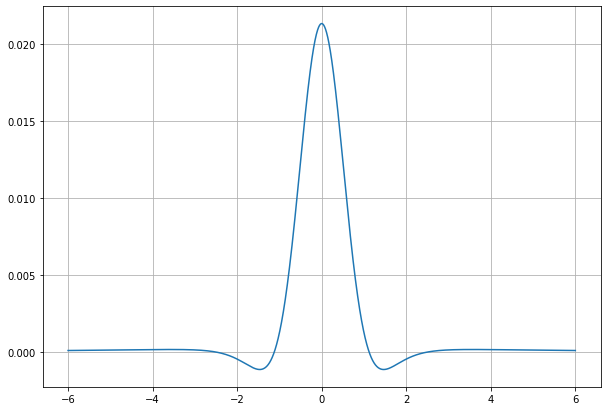

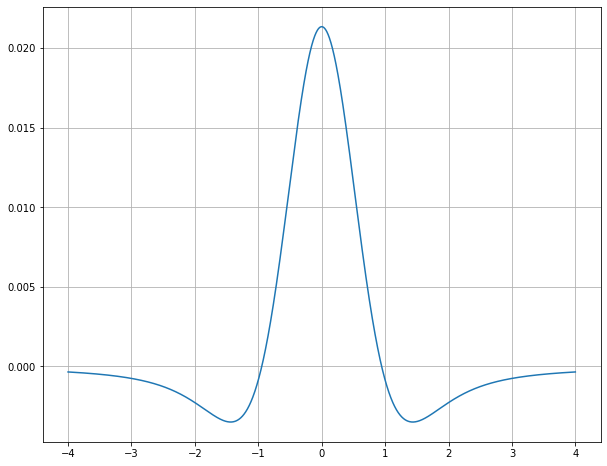

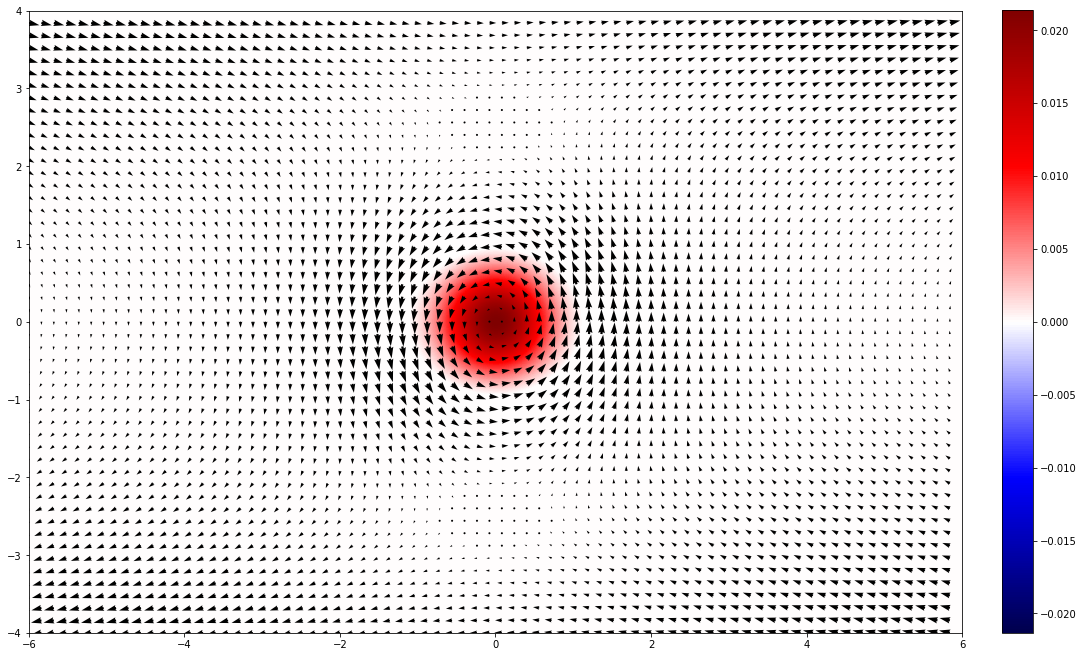

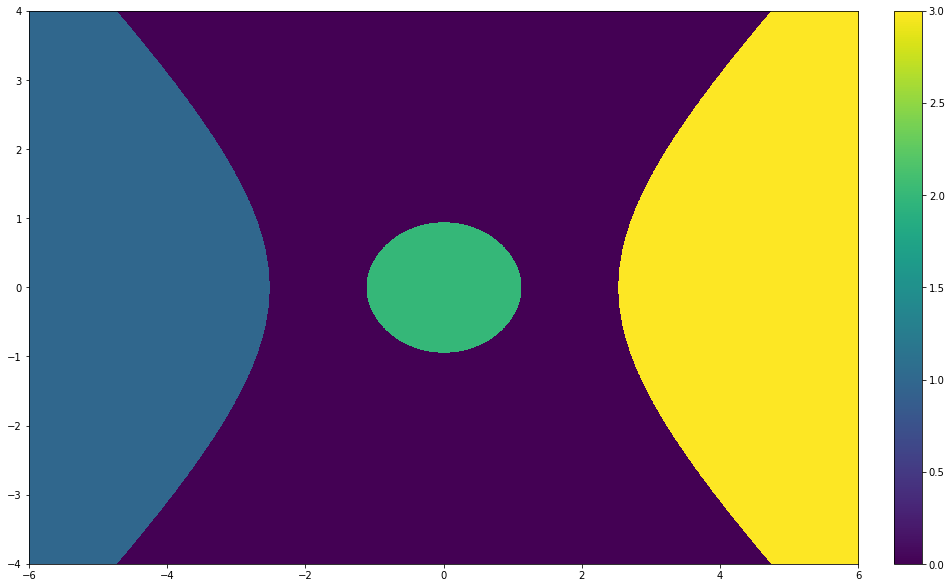

[0 1 2 3]
G,rc,xc,yc = -0.7401,2.317,-4.589,1.715e-16
G,rc,xc,yc = 0.7902,0.9149,1.407e-16,-1.596e-16
G,rc,xc,yc = -0.7401,2.317,4.589,1.714e-16


In [48]:
x0 = 0.0; y0 = 0.0

Gamma = 1.0
rc = 1.0
rc2 = rc**2

u = np.zeros(Xv.shape)
v = np.zeros(Yv.shape)

r2 = (Xv-x0)**2 + (Yv-y0)**2
Fr  = (Gamma/(2*np.pi*r2))*(1-np.exp(-r2/rc2))
u  += - (Yv-y0) * Fr
v  +=   (Xv-x0) * Fr

obar =  0.05
u   +=  0.5*obar*Yv

##############################################

ux = d_dx(u); uy = d_dy(u)
vx = d_dx(v); vy = d_dy(v)

w = vx - uy

detDu = ux*vy - uy*vx
lamb  = detDu 

##############################################

fig = plt.figure(figsize = (10,7))
plt.plot(X,lamb[:,Height//2])
plt.grid()
plt.show()

##############################################

fig = plt.figure(figsize = (10,8))
plt.plot(Y,lamb[Width//2,:])
plt.grid()
plt.show()

##############################################

lamb[lamb<0.0] = 0.0

fig = plt.figure(figsize=(18,18*((Ymax-Ymin)/(Xmax-Xmin))))

skip = 40
plt.quiver(Xv[::skip,::skip],Yv[::skip,::skip],u[::skip,::skip],v[::skip,::skip],scale = 7.5)

cbar = plt.imshow(lamb.T,extent=(Xmin,Xmax,Ymin,Ymax),
                       origin='lower', cmap='seismic',aspect='equal',
                       vmin = -np.max(lamb),vmax = np.max(lamb))
fig.colorbar(cbar,fraction=0.031, pad=0.04)

###############################################

blobs = measure.label(lamb>0.0,background=0)

fig = plt.figure(figsize=(16,16))

cbar = plt.imshow(blobs.T,extent=(Xmin,Xmax,Ymin,Ymax),origin='lower')
fig.colorbar(cbar,fraction=0.031, pad=0.04)

plt.show()

###############################################

blobs = measure.label(lamb>0.0,background=0)
print(np.unique(blobs))

for k in np.unique(blobs)[1:]:
    chi = np.zeros(lamb.shape)
    chi[blobs == k] = 1
    
    ###############################################
    # scipy.integrate.simps(y, x=None, dx=1, axis=- 1, even='avg')
    area     = sp.integrate.simps(sp.integrate.simps(chi,X,axis = 0),Y,axis=0)
    intOmega = sp.integrate.simps(sp.integrate.simps(chi*w,X,axis = 0),Y,axis=0)
    Xw       = sp.integrate.simps(sp.integrate.simps(chi*w*Xv,X,axis = 0),Y,axis=0)
    Yw       = sp.integrate.simps(sp.integrate.simps(chi*w*Yv,X,axis = 0),Y,axis=0)
    
    rc = np.sqrt(area/np.pi)/1.12091
    G  = 1.397948086 * intOmega
    xc = Xw/intOmega
    yc = Yw/intOmega
    
    print("G,rc,xc,yc = {0:.4g},{1:.4g},{2:.4g},{3:.4g}".format(G,rc,xc,yc))

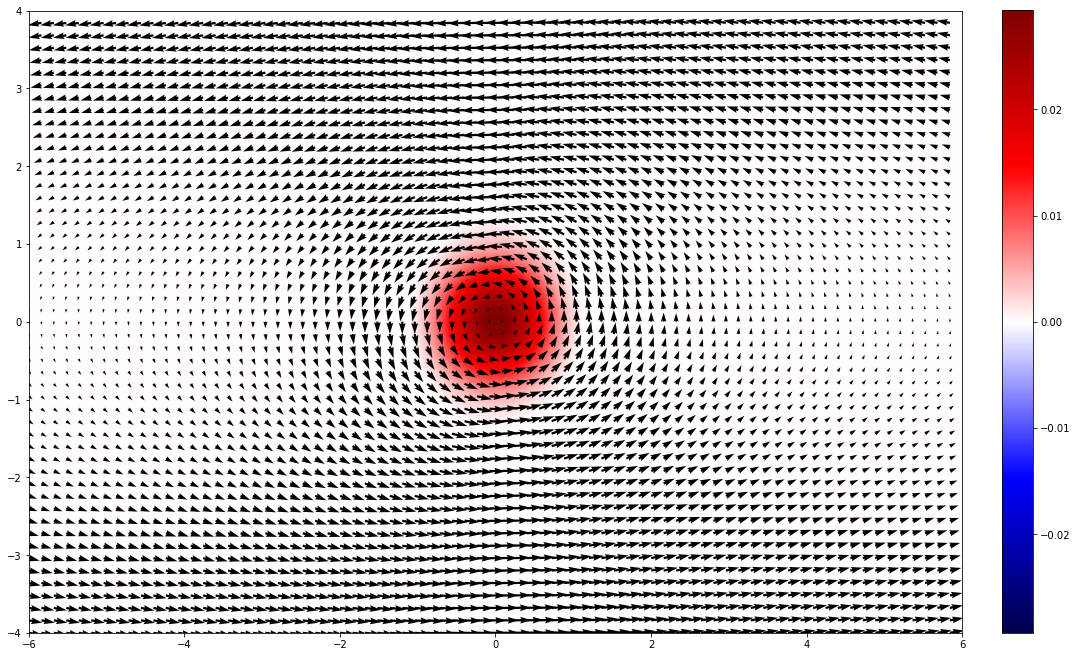

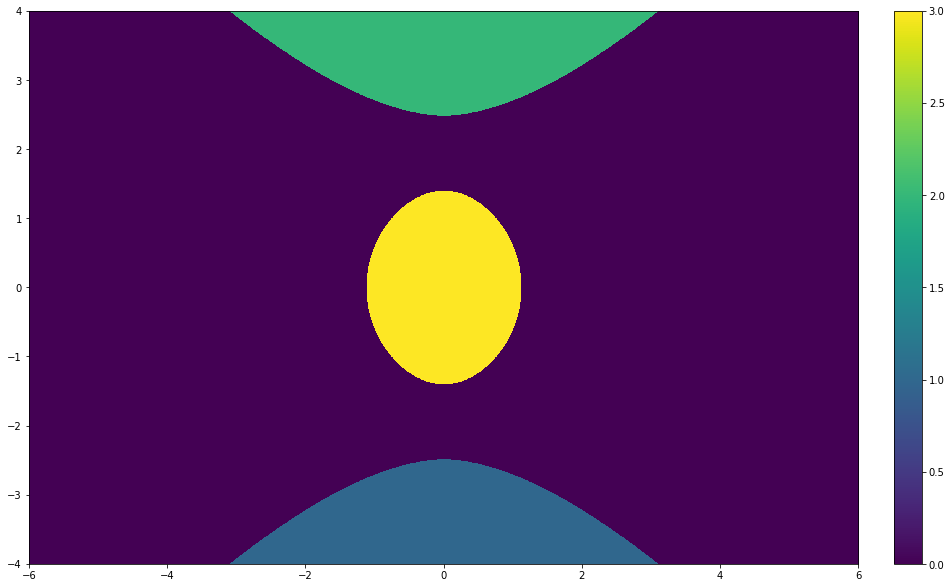

[0 1 2 3]
G,rc,xc,yc = 0.2054,1.22,2.633e-16,-3.415
G,rc,xc,yc = 0.2054,1.22,3.027e-16,3.415
G,rc,xc,yc = 1.261,1.109,1.852e-16,-1.231e-16


In [49]:
x0 = 0.0; y0 = 0.0

Gamma = 1.0
rc = 1.0
rc2 = rc**2

u = np.zeros(Xv.shape)
v = np.zeros(Yv.shape)

r2 = (Xv-x0)**2 + (Yv-y0)**2
Fr  = (Gamma/(2*np.pi*r2))*(1-np.exp(-r2/rc2))
u  += - (Yv-y0) * Fr
v  +=   (Xv-x0) * Fr

obar =  -0.05
u   +=  0.5*obar*Yv

##############################################

ux = d_dx(u); uy = d_dy(u)
vx = d_dx(v); vy = d_dy(v)

w = vx - uy

detDu = ux*vy - uy*vx
lamb  = detDu 

##############################################

lamb[lamb<0.0] = 0.0

fig = plt.figure(figsize=(18,18*((Ymax-Ymin)/(Xmax-Xmin))))

skip = 40
plt.quiver(Xv[::skip,::skip],Yv[::skip,::skip],u[::skip,::skip],v[::skip,::skip],scale = 7.5)

cbar = plt.imshow(lamb.T,extent=(Xmin,Xmax,Ymin,Ymax),
                       origin='lower', cmap='seismic',aspect='equal',
                       vmin = -np.max(lamb),vmax = np.max(lamb))
fig.colorbar(cbar,fraction=0.031, pad=0.04)

###############################################

blobs = measure.label(lamb>0.0,background=0)

fig = plt.figure(figsize=(16,16))

cbar = plt.imshow(blobs.T,extent=(Xmin,Xmax,Ymin,Ymax),origin='lower')
fig.colorbar(cbar,fraction=0.031, pad=0.04)

plt.show()

###############################################

blobs = measure.label(lamb>0.0,background=0)
print(np.unique(blobs))

for k in np.unique(blobs)[1:]:
    chi = np.zeros(lamb.shape)
    chi[blobs == k] = 1
    
    ###############################################
    # scipy.integrate.simps(y, x=None, dx=1, axis=- 1, even='avg')
    area     = sp.integrate.simps(sp.integrate.simps(chi,X,axis = 0),Y,axis=0)
    intOmega = sp.integrate.simps(sp.integrate.simps(chi*w,X,axis = 0),Y,axis=0)
    Xw       = sp.integrate.simps(sp.integrate.simps(chi*w*Xv,X,axis = 0),Y,axis=0)
    Yw       = sp.integrate.simps(sp.integrate.simps(chi*w*Yv,X,axis = 0),Y,axis=0)
    
    rc = np.sqrt(area/np.pi)/1.12091
    G  = 1.397948086 * intOmega
    xc = Xw/intOmega
    yc = Yw/intOmega
    
    print("G,rc,xc,yc = {0:.4g},{1:.4g},{2:.4g},{3:.4g}".format(G,rc,xc,yc))

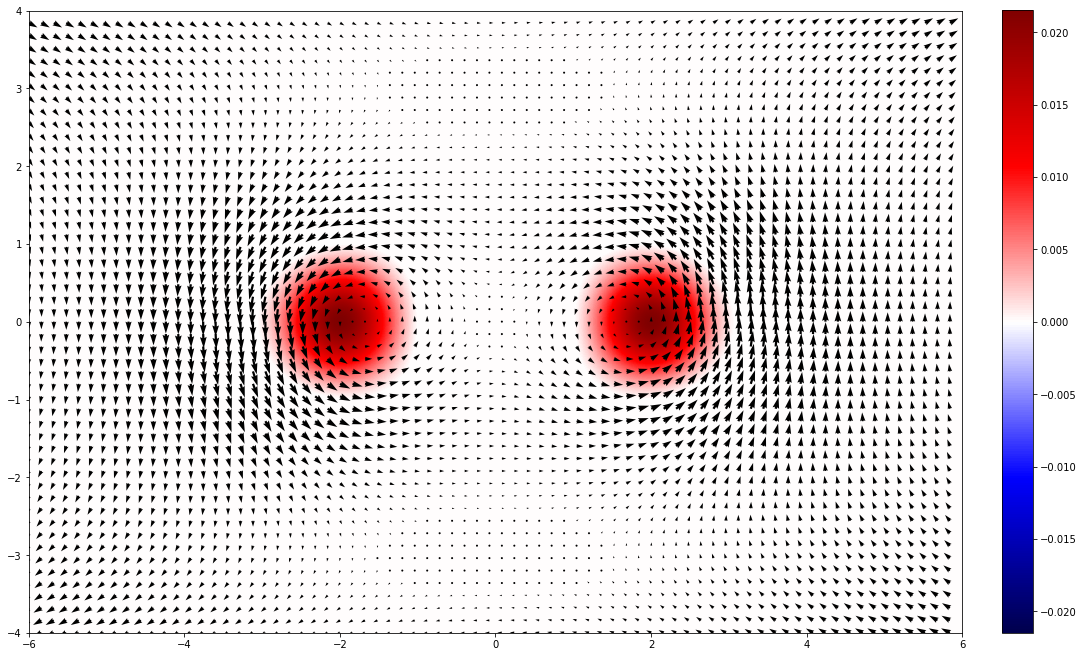

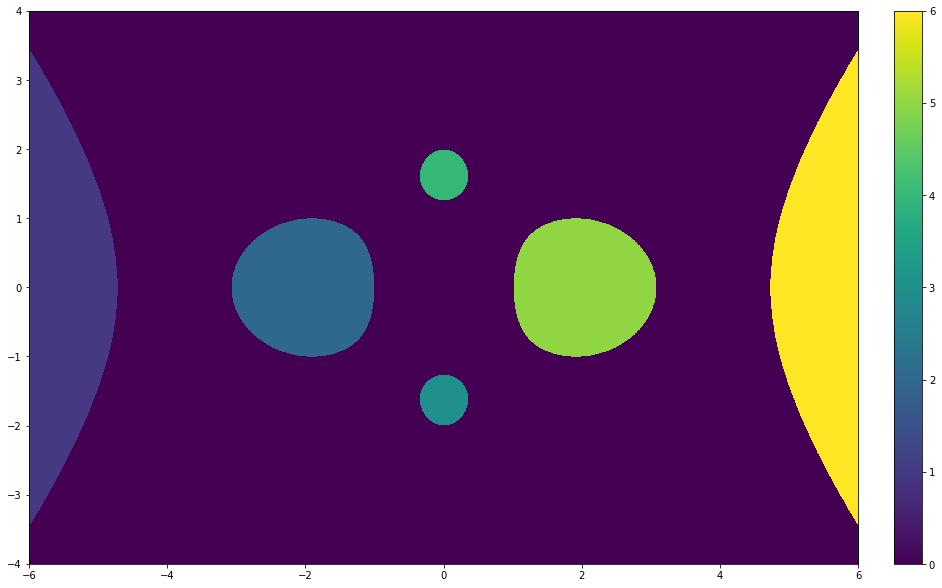

[0 1 2 3 4 5 6]
G,rc,xc,yc = -0.1961,1.192,-5.501,-1.979e-16
G,rc,xc,yc = 0.7948,0.9168,-2,-1.464e-16
G,rc,xc,yc = -0.01334,0.3184,2.694e-16,-1.63
G,rc,xc,yc = -0.01334,0.3184,3e-16,1.63
G,rc,xc,yc = 0.7948,0.9168,2,-1.464e-16
G,rc,xc,yc = -0.1961,1.192,5.501,-1.979e-16


In [50]:
x0,y0 = -2.0,0.0
x1,y1 =  2.0,0.0

Gamma0 = 1.0
Gamma1 = 1.0

Gamma = 1.0
rc = 1.0
rc2 = rc**2

u = np.zeros(Xv.shape)
v = np.zeros(Yv.shape)

r2 = (Xv-x0)**2 + (Yv-y0)**2
Fr = (Gamma0/(2*np.pi*r2))*(1-np.exp(-r2/rc2))
u += (- (Yv-y0) * Fr)
v +=    (Xv-x0) * Fr

r2 = (Xv-x1)**2 + (Yv-y1)**2
Fr = (Gamma1/(2*np.pi*r2))*(1-np.exp(-r2/rc2))
u += (- (Yv-y1) * Fr)
v +=    (Xv-x1) * Fr

obar =  0.05
u   +=  0.5*obar*Yv

##############################################

ux = d_dx(u); uy = d_dy(u)
vx = d_dx(v); vy = d_dy(v)

w = vx - uy

detDu = ux*vy - uy*vx
lamb  = detDu 

##############################################

lamb[lamb<0.0] = 0.0

fig = plt.figure(figsize=(18,18*((Ymax-Ymin)/(Xmax-Xmin))))

skip = 40
plt.quiver(Xv[::skip,::skip],Yv[::skip,::skip],u[::skip,::skip],v[::skip,::skip],scale = 7.5)

cbar = plt.imshow(lamb.T,extent=(Xmin,Xmax,Ymin,Ymax),
                       origin='lower', cmap='seismic',aspect='equal',
                       vmin = -np.max(lamb),vmax = np.max(lamb))
fig.colorbar(cbar,fraction=0.031, pad=0.04)

###############################################

blobs = measure.label(lamb>0.0,background=0)

fig = plt.figure(figsize=(16,16))

cbar = plt.imshow(blobs.T,extent=(Xmin,Xmax,Ymin,Ymax),origin='lower')
fig.colorbar(cbar,fraction=0.031, pad=0.04)

plt.show()

###############################################

blobs = measure.label(lamb>0.0,background=0)
print(np.unique(blobs))

for k in np.unique(blobs)[1:]:
    chi = np.zeros(lamb.shape)
    chi[blobs == k] = 1
    
    ###############################################
    # scipy.integrate.simps(y, x=None, dx=1, axis=- 1, even='avg')
    area     = sp.integrate.simps(sp.integrate.simps(chi,X,axis = 0),Y,axis=0)
    intOmega = sp.integrate.simps(sp.integrate.simps(chi*w,X,axis = 0),Y,axis=0)
    Xw       = sp.integrate.simps(sp.integrate.simps(chi*w*Xv,X,axis = 0),Y,axis=0)
    Yw       = sp.integrate.simps(sp.integrate.simps(chi*w*Yv,X,axis = 0),Y,axis=0)
    
    rc = np.sqrt(area/np.pi)/1.12091
    G  = 1.397948086 * intOmega
    xc = Xw/intOmega
    yc = Yw/intOmega
    
    print("G,rc,xc,yc = {0:.4g},{1:.4g},{2:.4g},{3:.4g}".format(G,rc,xc,yc))

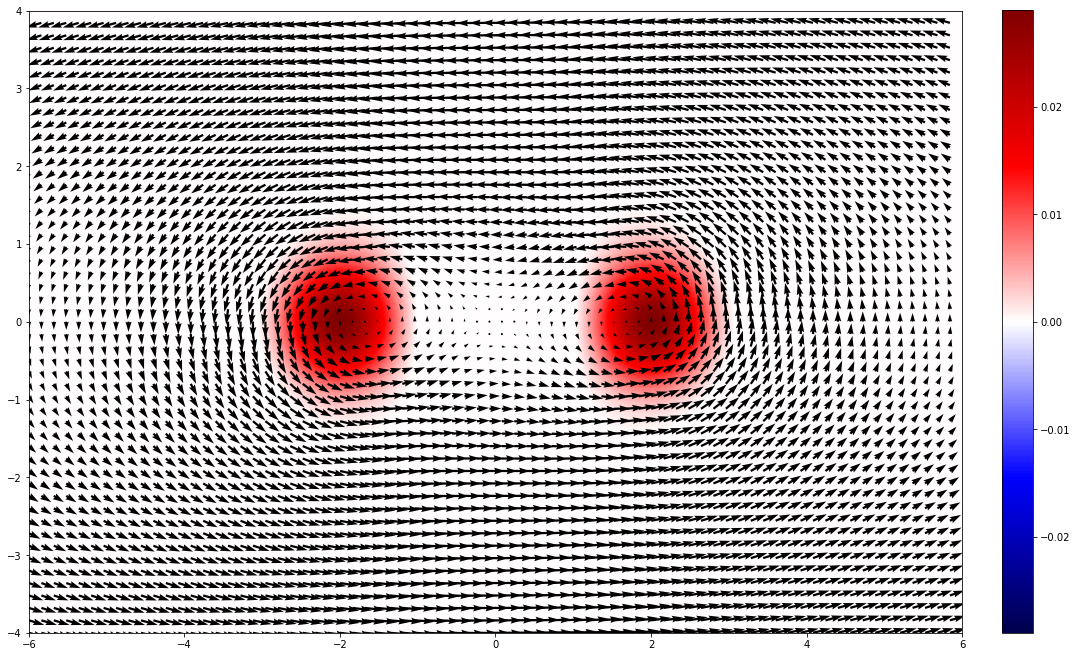

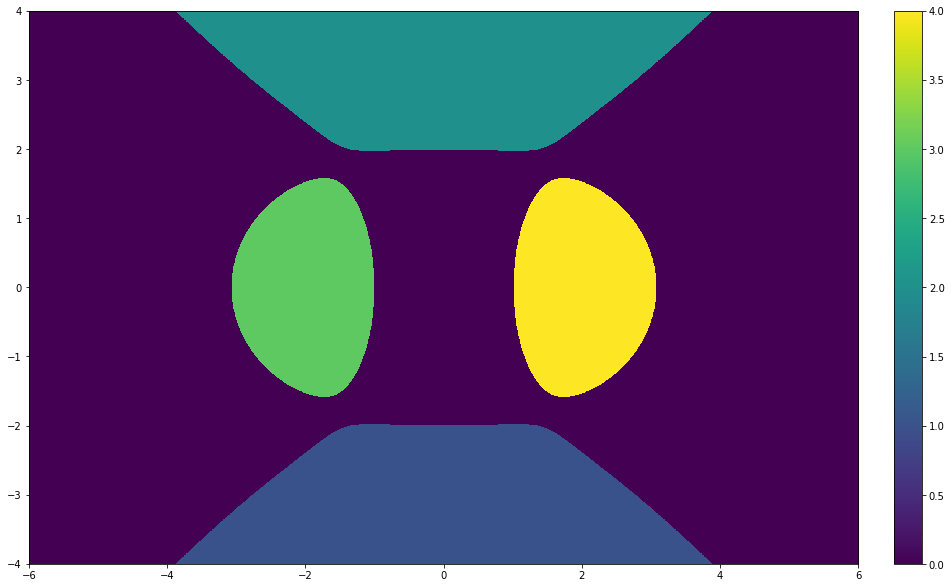

[0 1 2 3 4]
G,rc,xc,yc = 0.3863,1.668,3.417e-16,-3.137
G,rc,xc,yc = 0.3863,1.668,3.072e-16,3.137
G,rc,xc,yc = 1.26,1.13,-1.995,-7.699e-17
G,rc,xc,yc = 1.26,1.13,1.995,-7.699e-17


In [51]:
x0,y0 = -2.0,0.0
x1,y1 =  2.0,0.0

Gamma0 = 1.0
Gamma1 = 1.0

Gamma = 1.0
rc = 1.0
rc2 = rc**2

u = np.zeros(Xv.shape)
v = np.zeros(Yv.shape)

r2 = (Xv-x0)**2 + (Yv-y0)**2
Fr = (Gamma0/(2*np.pi*r2))*(1-np.exp(-r2/rc2))
u += (- (Yv-y0) * Fr)
v +=    (Xv-x0) * Fr

r2 = (Xv-x1)**2 + (Yv-y1)**2
Fr = (Gamma1/(2*np.pi*r2))*(1-np.exp(-r2/rc2))
u += (- (Yv-y1) * Fr)
v +=    (Xv-x1) * Fr

obar =  -0.05
u   +=  0.5*obar*Yv

##############################################

ux = d_dx(u); uy = d_dy(u)
vx = d_dx(v); vy = d_dy(v)

w = vx - uy

detDu = ux*vy - uy*vx
lamb  = detDu 

##############################################

lamb[lamb<0.0] = 0.0

fig = plt.figure(figsize=(18,18*((Ymax-Ymin)/(Xmax-Xmin))))

skip = 40
plt.quiver(Xv[::skip,::skip],Yv[::skip,::skip],u[::skip,::skip],v[::skip,::skip],scale = 7.5)

cbar = plt.imshow(lamb.T,extent=(Xmin,Xmax,Ymin,Ymax),
                       origin='lower', cmap='seismic',aspect='equal',
                       vmin = -np.max(lamb),vmax = np.max(lamb))
fig.colorbar(cbar,fraction=0.031, pad=0.04)

###############################################

blobs = measure.label(lamb>0.0,background=0)

fig = plt.figure(figsize=(16,16))

cbar = plt.imshow(blobs.T,extent=(Xmin,Xmax,Ymin,Ymax),origin='lower')
fig.colorbar(cbar,fraction=0.031, pad=0.04)

plt.show()

###############################################

blobs = measure.label(lamb>0.0,background=0)
print(np.unique(blobs))

for k in np.unique(blobs)[1:]:
    chi = np.zeros(lamb.shape)
    chi[blobs == k] = 1
    
    ###############################################
    # scipy.integrate.simps(y, x=None, dx=1, axis=- 1, even='avg')
    area     = sp.integrate.simps(sp.integrate.simps(chi,X,axis = 0),Y,axis=0)
    intOmega = sp.integrate.simps(sp.integrate.simps(chi*w,X,axis = 0),Y,axis=0)
    Xw       = sp.integrate.simps(sp.integrate.simps(chi*w*Xv,X,axis = 0),Y,axis=0)
    Yw       = sp.integrate.simps(sp.integrate.simps(chi*w*Yv,X,axis = 0),Y,axis=0)
    
    rc = np.sqrt(area/np.pi)/1.12091
    G  = 1.397948086 * intOmega
    xc = Xw/intOmega
    yc = Yw/intOmega
    
    print("G,rc,xc,yc = {0:.4g},{1:.4g},{2:.4g},{3:.4g}".format(G,rc,xc,yc))